In [1]:
import torch

In [2]:
k = 30

In [3]:
mu = torch.randn(k,  requires_grad=True)
optimizer = torch.optim.SGD([mu], lr=1e-2)
for t in range(0,10000):
    x = torch.cat((torch.tensor([1.0]), torch.sigmoid(mu)))
    z = torch.cat((x[-1:], x[:-1])) 
    equi = x * z + (1-x) * (1-z)
    all_equi = torch.prod(equi)
    loss = -torch.log(all_equi)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
torch.round(x*100)

tensor([100.,  99.,  50.,   1.,   1.,   1.,  50.,  99.,  99.,  99.,  99.,  99.,
         99.,  50.,   1.,   1.,   1.,   1.,  50.,  99.,  99.,  99.,  99.,  99.,
         99.,  99.,  99.,  99.,  99.,  99.,  99.], grad_fn=<RoundBackward>)

In [4]:
k = 30
# works well when initialized well, e.g. when const >=0 (param values >= 0.5)
const = 0.0
mu = torch.ones(k)
mu = mu.mul(const)
mu.requires_grad_()
optimizer = torch.optim.SGD([mu], lr=1e-2)
print('mu:', mu)
for t in range(0,10000):
    x = torch.cat((torch.tensor([1.0]), torch.sigmoid(mu)))
    if t == 0:
        print('x:', x)
    z = torch.cat((x[-1:], x[:-1])) 
    equi = x * z + (1-x) * (1-z)
    all_equi = torch.prod(equi)
    loss = -torch.log(all_equi)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
torch.round(x*100)

mu: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)
x: tensor([1.0000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000], grad_fn=<CatBackward>)


tensor([100.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,
         99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,
         99.,  99.,  99.,  99.,  99.,  99.,  99.], grad_fn=<RoundBackward>)

In [5]:
mu = torch.randn(k,  requires_grad=True)

In [6]:
optimizer = torch.optim.SGD([mu], lr=1e-2)
for t in range(0,10000):
    x = torch.cat((torch.tensor([1.0]), torch.sigmoid(mu)))
    all_equi = torch.prod(x) + torch.prod(1.0 - x)
    loss = -torch.log(all_equi)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
loss, torch.round(x*100)

(tensor(0.3082, grad_fn=<NegBackward>),
 tensor([100.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,
          99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,
          99.,  99.,  99.,  99.,  99.,  99.,  99.], grad_fn=<RoundBackward>))

In [7]:
mu = torch.randn(k,  requires_grad=True)
x = torch.cat((torch.tensor([1.0]), torch.sigmoid(mu)))
def compute_all_equi(x):
    all_equi_true = 1.0
    all_equi_false = 1.0
    for i in range(0,k+1):
        prev = i-1 % k
        all_equi_true = all_equi_true * x[i]
        all_equi_false = all_equi_false * (1-x[i])
    return all_equi_false + all_equi_true

def compute_all_equi_uncorrected(x):
    all_equi_dumb = 1.0
    for i in range(0,k+1):
        prev = i-1 % k
        all_equi_dumb = all_equi_dumb * ((x[i] * x[prev]) + (1-x[i]) * (1-x[prev]))
    return all_equi_dumb

def compute_all_equi_corrected(x):
    all_equi_dumb = 1.0
    for i in range(0,k+1):
        prev = i-1 % k
        
        all_equi_dumb = all_equi_dumb * ((x[i] * x[prev]) + (1-x[i]) * (1-x[prev]))
        all_equi_dumb += all_equi_dumb * ((x[i] * (1-x[prev])) + (1-x[i]) * x[prev])
    return all_equi_dumb

compute_all_equi_uncorrected(x), compute_all_equi(x), compute_all_equi_corrected(x)

(tensor(2.2215e-11, grad_fn=<ThMulBackward>),
 tensor(1.3803e-10, grad_fn=<ThAddBackward>),
 tensor(0.0000, grad_fn=<ThAddBackward>))

In [8]:
mu = torch.randn(k,  requires_grad=True)
optimizer = torch.optim.SGD([mu], lr=1e-1)
for t in range(0,400):
    x = torch.cat((torch.tensor([1.0]), torch.sigmoid(mu)))
#     print(x)
#     all_equi = compute_all_equi(x)
    all_equi = compute_all_equi_uncorrected(x)
    loss = -torch.log(all_equi)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
#     print(loss)

loss, torch.round(x*100)

(tensor(6.3693, grad_fn=<NegBackward>),
 tensor([100.,  99.,  98.,  54.,   7.,   3.,  49.,  96.,  98.,  99.,  99.,  99.,
          98.,  98.,  98.,  98.,  98.,  99.,  99.,  99.,  99.,  99.,  99.,  98.,
          51.,   3.,   2.,   3.,  49.,  96.,  99.], grad_fn=<RoundBackward>))

In [78]:
eq_12 = x[0] * x[1] + (1-x[0])*(1 - x[1])
eq_12_true = x[0] * x[1]
eq_12_false = (1-x[0]) * (1-x[1])
eq_123_true =  eq_12_true * x[2]
eq_123_false = eq_12_false * (1-x[2])
eq_23_true = x[1] * x[2]
eq_23_false = (1-x[1])*(1-x[2])
eq_123_true, eq_12_true * eq_23_true

(tensor(0.1128), tensor(0.0531))

In [9]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

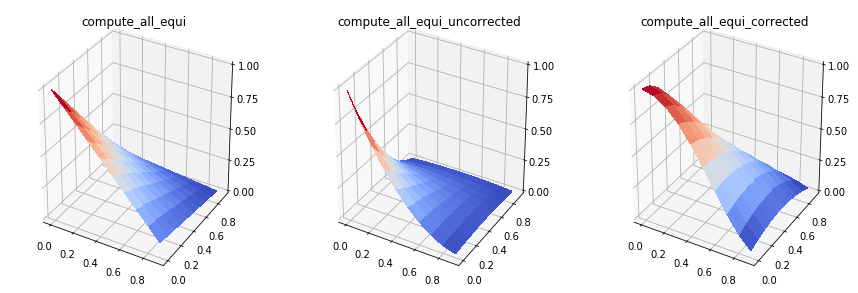

In [11]:
functions = [compute_all_equi, compute_all_equi_uncorrected, compute_all_equi_corrected]
k = 2

fig = plt.figure(figsize=(15, 5))
for i, fun in enumerate(functions):
    ax = fig.add_subplot(131 + i, projection='3d')
    X = np.arange(0, 1, 0.1)
    Y = np.arange(0, 1, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = fun([0, X, Y])

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(5))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#     ax.set_xlabel(r'x[1]')
#     ax.set_ylabel(r'x[2]')
    ax.set_title(fun.__name__)
    ax.set_zlim(-0.00, 1.00)
    
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()